In [4]:
import sys
sys.path.append('C:/Users/Ade/Documents')
from Mis_librerias import *

In [6]:
infiel = pd.read_csv(r'C:\Users\Ade\Documents\ML\infiel.csv')
infiel

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,fidelidad
0,3.00,32.00,9.00,3.00,3.00,17.00,2.00,5.00,0.11,1
1,3.00,27.00,13.00,3.00,1.00,14.00,3.00,4.00,3.23,1
2,4.00,22.00,2.50,0.00,1.00,16.00,3.00,5.00,1.40,1
3,4.00,37.00,16.50,4.00,3.00,16.00,5.00,5.00,0.73,1
4,5.00,27.00,9.00,1.00,1.00,14.00,3.00,4.00,4.67,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.00,32.00,13.00,2.00,3.00,17.00,4.00,3.00,0.00,0
6362,4.00,32.00,13.00,1.00,1.00,16.00,5.00,5.00,0.00,0
6363,5.00,22.00,2.50,0.00,2.00,14.00,3.00,1.00,0.00,0
6364,5.00,32.00,6.00,1.00,3.00,14.00,3.00,4.00,0.00,0


In [7]:
#clasifico mis datos 
X = infiel.drop(["affairs","fidelidad"], axis=1)
y = infiel.fidelidad 

In [9]:
# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_train.shape)

X_train shape: (5092, 8)
X_test shape: (1274, 8)
y_train shape: (5092,)
y_test shape: (5092,)


In [10]:
# Utilizar LazyClassifier para evaluar varios modelos

models, predictions = LazyClassifier().fit(X_train, X_test, y_train, y_test)
models = models.sort_values(by='Accuracy', ascending=False)
models

100%|██████████| 29/29 [00:11<00:00,  2.60it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.72,0.65,0.65,0.71,0.24
RidgeClassifier,0.72,0.63,0.63,0.70,0.02
SVC,0.72,0.62,0.62,0.69,1.71
LogisticRegression,0.72,0.64,0.64,0.70,0.05
RidgeClassifierCV,0.72,0.63,0.63,0.70,0.02
LinearDiscriminantAnalysis,0.72,0.64,0.64,0.70,0.02
CalibratedClassifierCV,0.72,0.63,0.63,0.70,0.86
LinearSVC,0.72,0.63,0.63,0.70,0.28
LGBMClassifier,0.71,0.65,0.65,0.70,0.12


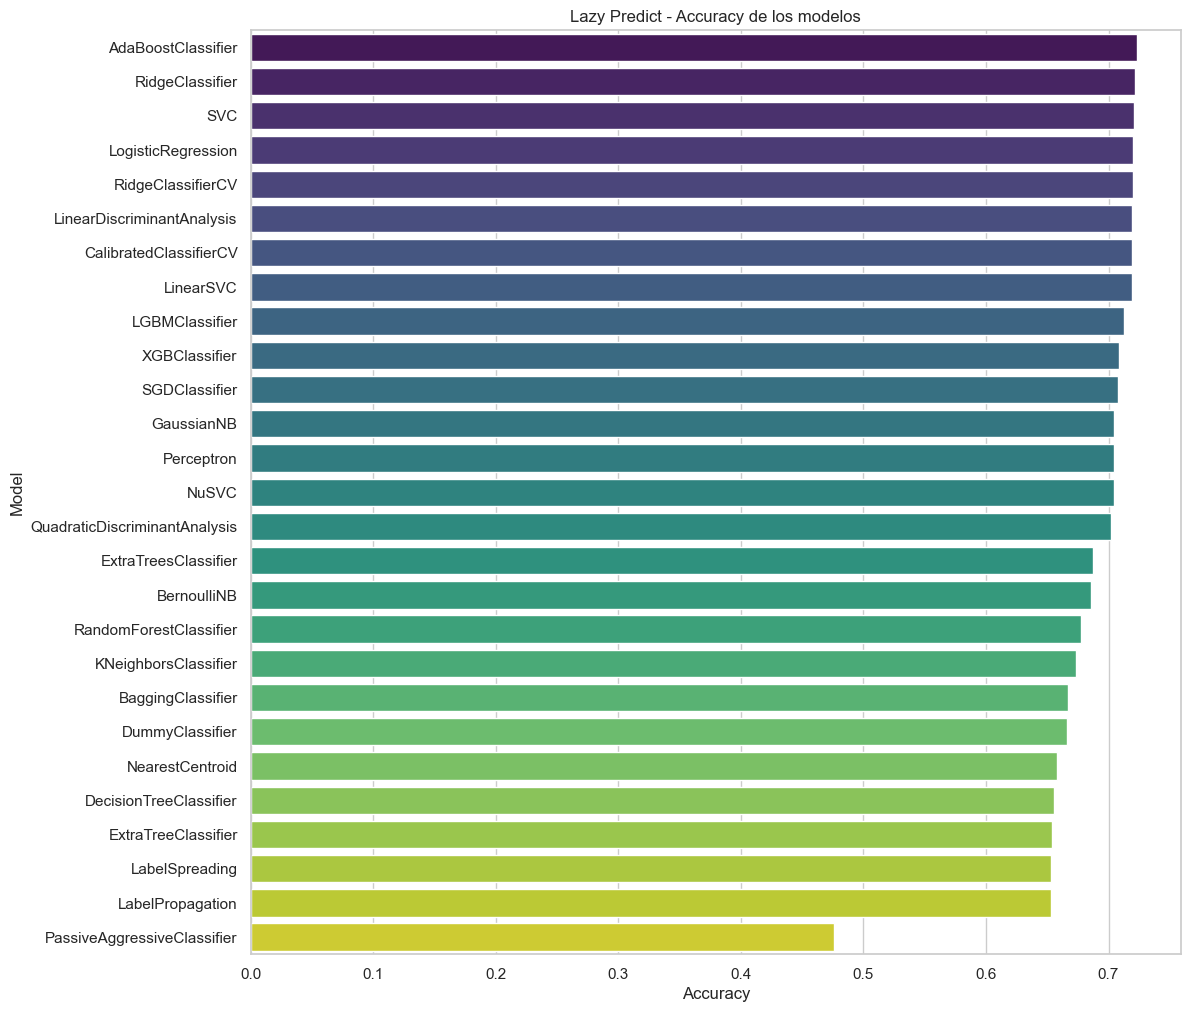

In [11]:
# Mostrar el gráfico de barras by Accuracy
plt.figure(figsize=(12,12))
sns.set(style="whitegrid")
ax = sns.barplot(x="Accuracy", y=models.index, data=models, palette='viridis')
plt.title("Lazy Predict - Accuracy de los modelos")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

Text(0, 0.5, 'Model')

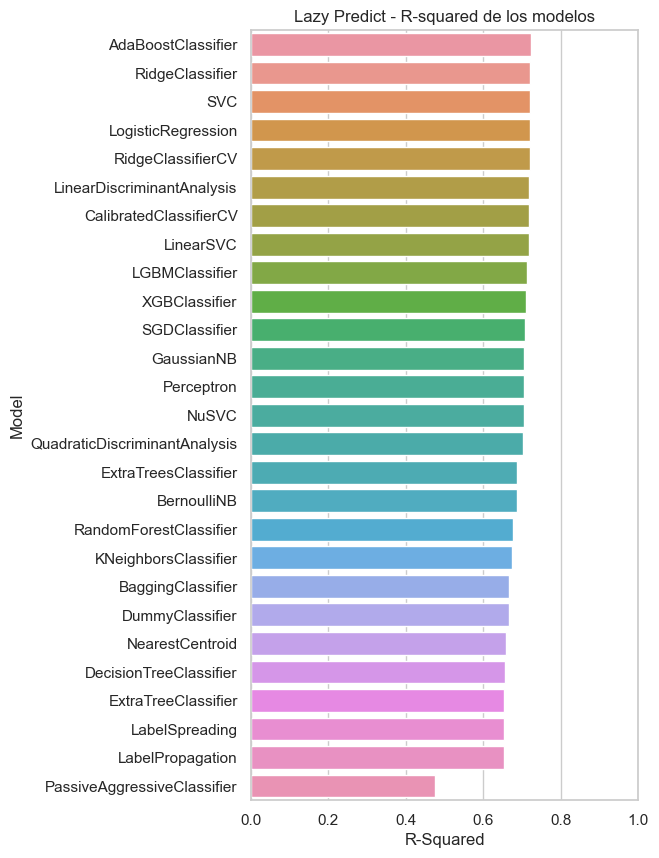

In [12]:
# Mostrar el gráfico de barras by R-squared
predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
sorted_predictions = predictions.sort_values(by='R-Squared', ascending=False)
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=sorted_predictions.index, x="R-Squared", data=sorted_predictions)
ax.set(xlim=(0, 1))
plt.title("Lazy Predict - R-squared de los modelos")
plt.xlabel("R-Squared")
plt.ylabel("Model")

In [13]:
classifiers_clasif = [
    (LogisticRegression(),
     {"penalty": ["l1", "l2", "elasticnet"],
      "C": [0.001, 0.01, 0.1, 1, 10],
      "solver": ["liblinear", "saga"]}),
    (DecisionTreeClassifier(),
     {"criterion": ["gini", "entropy"],
      "max_depth": [5, 10, None],
      "min_samples_split": [2, 5, 10]}),
    (RandomForestClassifier(),
     {"n_estimators": [10, 100],
      "max_features": [1, 2, 3]}),
    (KNeighborsClassifier(),
     {"n_neighbors": [3, 5, 7],
      "weights": ['uniform', 'distance'],
      "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    (SVC(),
     {"kernel": ['linear', 'rbf', 'sigmoid', 'poly'],
      "C": [0.001, 0.1, 0.5, 1, 5, 10],
      "degree": [1, 2, 3, 4],
      "gamma": ['scale', 'auto']}),
    (GradientBoostingClassifier(),
     {"learning_rate": [0.001, 0.01, 0.1],
      "n_estimators": [50, 100, 200],
      "max_depth": [3, 5, 7],
      "min_samples_split": [2, 5, 10]}),
    (AdaBoostClassifier(),
     {"n_estimators": [50, 100, 200],
      "learning_rate": [0.1, 0.5, 1]})]

best_model = None
best_score = 0.0
best_params = None
best_report = None

In [14]:
def get_best_model(classifiers, X_train, y_train, X_test, y_test):
    best_score = 0
    best_clf = None
    for clf, param in classifiers:
        random_search = RandomizedSearchCV(clf, param_distributions=param, cv=5, n_iter=10,
                                           n_jobs=cpu_count(), verbose=1, scoring='accuracy')
        random_search.fit(X_train, y_train)
        score = random_search.best_score_
        if score > best_score:
            best_score = score
            best_clf = random_search.best_estimator_
    print(f"Best score: {best_score:.4f}")
    print("Best model:")
    print(best_clf)
    y_pred = best_clf.predict(X_test)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    return best_clf, classification_report(y_test, y_pred)

In [15]:
# Cargar el dataset 
infiel = pd.read_csv(r'C:\Users\Ade\Documents\ML\Multipage_App\infiel.csv')
X = infiel.drop(["affairs","fidelidad"], axis=1)
y = infiel.fidelidad 

# Dividir datos en train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Llamar a la función best_model
best_model, best_report = get_best_model(classifiers_clasif, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.7319
Best model:
AdaBoostClassifier(learning_rate=1)
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       849
           1       0.62      0.43      0.51       425

    accuracy                           0.72      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.71      0.72      0.71      1274



In [16]:
# Crea el modelo AdaBoost
adda_model = AdaBoostClassifier(n_estimators=100, random_state=42)
print(adda_model.fit(X_train, y_train))
# entrena Adda model
predictions_adda = adda_model.predict(X_test)
print("                      AdaBoost Model")
print("-"*50)
print(classification_report(y_test, predictions_adda))

AdaBoostClassifier(n_estimators=100, random_state=42)
                      AdaBoost Model
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       849
           1       0.62      0.44      0.52       425

    accuracy                           0.72      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.71      0.72      0.71      1274



In [17]:
# Entrenar el modelo de regresión logística
from sklearn.model_selection import cross_val_score


max_iter = 1000
logistic_model = LogisticRegression(max_iter=max_iter)
logistic_model.fit(X_train, y_train)

# Evaluar el modelo utilizando cross-validation
cross_val = cross_val_score(logistic_model, X=X_train, y=y_train, scoring='accuracy', cv=5)
print("Precisión del modelo: %.2f%%" % (cross_val.mean() * 100.0))

# Imprimir un informe detallado
predictions_log = logistic_model.predict(X_test)
print("                      Logistic Model")
print("-"*50)
print(classification_report(y_test, predictions_log))

Precisión del modelo: 72.35%
                      Logistic Model
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       849
           1       0.63      0.39      0.48       425

    accuracy                           0.72      1274
   macro avg       0.69      0.64      0.64      1274
weighted avg       0.71      0.72      0.70      1274



In [18]:
from sklearn import svm


pipe = Pipeline(steps=[
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,2,3]
}

svm_param = {
    'classifier': [svm.SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
}

decision_tree_param = {
    'classifier': [DecisionTreeClassifier()],
    'classifier__max_depth': [2, 3, 4, 5],
    'classifier__min_samples_split': [2,4,6,8,10]

}
search_space = [
    logistic_params,
    random_forest_params,
    svm_param, decision_tree_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            penalty='l1',
                                                            solver='liblinear')],
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3]},
                         {'classifier': [SVC()],
                          'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100]},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__max_depth': [2, 3, 4, 5],
                          'classifier__min_samples_split': [2, 4, 6, 8, 10]}])

In [19]:
print(clf.best_estimator_)
print(clf.best_score_)
print(clf.best_params_)
print("-"*50)
# hacer predicciones en los datos de prueba
predictions_grid = clf.best_estimator_.predict(X_test)

# imprimir el informe de clasificación
print(clf.best_estimator_)
print("                    Decision Tree Class_2 Model")
print("-"*50)
print(classification_report(y_test, predictions_grid))

Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    solver='liblinear'))])
0.7244647328479525
{'classifier': LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear'), 'classifier__penalty': 'l1'}
--------------------------------------------------
Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    solver='liblinear'))])
                    Decision Tree Class_2 Model
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       849
           1       0.63      0.38      0.48       425

    accuracy                           0.72      1274
   macro avg       0.69      0.64      0.64      1274
weighted avg       0.70      0.72      0.70      1274



In [20]:
print("                  RESUMEN GLOBAL MODELOS")
print("                      AdaBoost Model")
print("-"*50)
print(classification_report(y_test, predictions_adda))
print("                      Logistic Model")
print("-"*50)
print(classification_report(y_test, predictions_log))
print("                      Decision Tree_2 Model")
print("-"*50)
print(classification_report(y_test, predictions_grid))

                  RESUMEN GLOBAL MODELOS
                      AdaBoost Model
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       849
           1       0.62      0.44      0.52       425

    accuracy                           0.72      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.71      0.72      0.71      1274

                      Logistic Model
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       849
           1       0.63      0.39      0.48       425

    accuracy                           0.72      1274
   macro avg       0.69      0.64      0.64      1274
weighted avg       0.71      0.72      0.70      1274

                      Decision Tree_2 Model
--------------------------------------------------
              precision    recall 